In [1]:
import pandas as pd
import json

In [2]:
results= json.load(open("../results/results.json", "r"))

len(results)

44

In [3]:
results_dict = {}

for x in results:
	if x["Test Dataset"] == "x-ginco":
		model = x["Model"]
		cur_result = results_dict.get(model, {})
		for lang in ["Slovenian", "Croatian", "Macedonian"]:
			cur_result[f"{lang} (macro-F1)"] = x['Language-Specific Scores'][lang]["Macro F1"]
			cur_result[f"{lang} (micro-F1)"] = x['Language-Specific Scores'][lang]["Micro F1"]
		results_dict[model] = cur_result
	elif x["Test Dataset"] == "en-ginco":
		model = x["Model"]
		cur_result = results_dict.get(model, {})
		for lang in ["English" ]:
			cur_result[f"{lang} (macro-F1)"] = x['Language-Specific Scores'][lang]["Macro F1"]
			cur_result[f"{lang} (micro-F1)"] = x['Language-Specific Scores'][lang]["Micro F1"]
		results_dict[model] = cur_result

results_df = pd.DataFrame(results_dict).transpose()
results_df.reset_index(names="Model", inplace=True)

# Rename some models
rename_dict = {
	"dummy-most_frequent": "Dummy (Most Frequent)",
	"dummy-stratified": "Dummy (Stratified)",
	"SVC": "Support Vector Machine",
	"COMPLEMENTNB": "Naive Bayes Classifier",
	"LOGISTICREGRESSION": "Logistic Regression"
	# Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),English (macro-F1),English (micro-F1)
0,Dummy (Most Frequent),0.027778,0.125000,0.025281,0.112500,0.032609,0.150000,0.037829,0.178295
1,Dummy (Stratified),0.128207,0.142857,0.054762,0.064103,0.064948,0.064935,0.101740,0.166337
2,fastText,0.421889,0.435897,0.168691,0.265823,0.093762,0.150000,0.458750,0.474308
3,NLI zero-shot model,0.131177,0.157143,0.118561,0.169231,0.196114,0.213333,0.159701,0.231293
4,Support Vector Machine,0.482661,0.493671,0.196589,0.240506,0.067235,0.137500,0.571848,0.511628
5,Naive Bayes Classifier,0.213524,0.300000,0.139205,0.213836,0.144146,0.163522,0.336396,0.379845
6,Logistic Regression,0.563193,0.560510,0.116862,0.154839,0.098782,0.125000,0.508563,0.494118
7,X-GENRE classifier,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500,0.751920,0.710059
8,Mistral Medium 3.1,0.751347,0.775000,0.709176,0.737500,0.740609,0.762500,0.724418,0.779070
9,Gemini 2.5 Flash,0.718463,0.725000,0.774428,0.787500,0.672083,0.675000,0.792455,0.810078


In [4]:
# Save the results

results_df.to_json("results_combined.json", orient="records", lines=True)


# Plot a bar plot

In [5]:
results_df = pd.read_json("results_combined.json", orient="records", lines=True)
results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),English (macro-F1),English (micro-F1)
0,Dummy (Most Frequent),0.027778,0.125000,0.025281,0.112500,0.032609,0.150000,0.037829,0.178295
1,Dummy (Stratified),0.128207,0.142857,0.054762,0.064103,0.064948,0.064935,0.101740,0.166337
2,fastText,0.421889,0.435897,0.168691,0.265823,0.093762,0.150000,0.458750,0.474308
3,NLI zero-shot model,0.131177,0.157143,0.118561,0.169231,0.196114,0.213333,0.159701,0.231293
4,Support Vector Machine,0.482661,0.493671,0.196589,0.240506,0.067235,0.137500,0.571848,0.511628
5,Naive Bayes Classifier,0.213524,0.300000,0.139205,0.213836,0.144146,0.163522,0.336396,0.379845
6,Logistic Regression,0.563193,0.560510,0.116862,0.154839,0.098782,0.125000,0.508563,0.494118
7,X-GENRE classifier,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500,0.751920,0.710059
8,Mistral Medium 3.1,0.751347,0.775000,0.709176,0.737500,0.740609,0.762500,0.724418,0.779070
9,Gemini 2.5 Flash,0.718463,0.725000,0.774428,0.787500,0.672083,0.675000,0.792455,0.810078


In [6]:
list(results_df.Model.unique())

['Dummy (Most Frequent)',
 'Dummy (Stratified)',
 'fastText',
 'NLI zero-shot model',
 'Support Vector Machine',
 'Naive Bayes Classifier',
 'Logistic Regression',
 'X-GENRE classifier',
 'Mistral Medium 3.1',
 'Gemini 2.5 Flash',
 'GPT-5-nano',
 'GPT-4o',
 'GPT-5-mini',
 'GPT-3.5-Turbo',
 'GPT-4o-mini',
 'DeekSeek-R1',
 'GaMS-Instruct 27B',
 'Llama 3.3',
 'Gemma 3',
 'Qwen3',
 'Gemini 2.5 Pro',
 'GPT-5']

In [7]:
rename_dict = {
    "gpt-4o-2024-08-06": "GPT-4o",
    "gpt-3.5-turbo-0125": "GPT-3.5-Turbo",
    "gpt-4o-mini-2024-07-18": "GPT-4o-mini",
    "gemma3:27b": "Gemma 3",
    "gemma2:27b": "Gemma 2",
    "Llama 3.3": "LLaMA 3.3",
    "DeekSeek-R1": "DeepSeek-R1-Distill",
    "Dummy (Most Frequent)": "Dummy (Frequent)",
    "X-GENRE classifier": "Fine-Tuned BERT-Like Model",
    "SVC": "Support Vector Machine",
    "COMPLEMENTNB": "Naive Bayes Classifier",
    "LOGISTICREGRESSION": "Logistic Regression",
    "gpt-5-mini-2025-08-07": "GPT-5-mini",
    "gpt-5": "GPT-5",
    "gpt-5-nano-2025-08-07": "GPT-5-nano",
	"llama4:scout": "LLaMA 4 Scout",
	"Qwen3": "Qwen 3"
    # Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)

In [8]:
# Filter out some models
results_df = results_df[results_df["Model"].isin(['Fine-Tuned BERT-Like Model', 'Gemini 2.5 Flash', 'GPT-5','GPT-4o', 'Mistral Medium 3.1', 'LLaMA 3.3', 'Gemma 3', 'GPT-3.5-Turbo', 'Qwen 3', 'DeepSeek-R1-Distill',  'Dummy (Frequent)'])]

results_df.sort_values(by="Model", ascending=True)


,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),English (macro-F1),English (micro-F1)
15,DeepSeek-R1-Distill,0.354791,0.396694,0.370612,0.396694,0.417642,0.427481,0.412181,0.506977
0,Dummy (Frequent),0.027778,0.125000,0.025281,0.112500,0.032609,0.150000,0.037829,0.178295
7,Fine-Tuned BERT-Like Model,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500,0.751920,0.710059
13,GPT-3.5-Turbo,0.594614,0.587500,0.591614,0.587500,0.508993,0.509554,0.566300,0.648544
11,GPT-4o,0.795139,0.800000,0.769334,0.775000,0.783624,0.800000,0.746628,0.767442
21,GPT-5,0.785263,0.787500,0.722351,0.737500,0.716665,0.712500,0.835380,0.833333
9,Gemini 2.5 Flash,0.718463,0.725000,0.774428,0.787500,0.672083,0.675000,0.792455,0.810078
18,Gemma 3,0.672963,0.662500,0.715242,0.737500,0.691186,0.700000,0.712072,0.740310
17,LLaMA 3.3,0.758149,0.762500,0.765367,0.775000,0.758635,0.762500,0.703509,0.767442
8,Mistral Medium 3.1,0.751347,0.775000,0.709176,0.737500,0.740609,0.762500,0.724418,0.779070


In [9]:
print(results_df.sort_values(by="Slovenian (macro-F1)", ascending=False).round(2).to_markdown(index=False))

| Model                      |   Slovenian (macro-F1) |   Slovenian (micro-F1) |   Croatian (macro-F1) |   Croatian (micro-F1) |   Macedonian (macro-F1) |   Macedonian (micro-F1) |   English (macro-F1) |   English (micro-F1) |
|:---------------------------|-----------------------:|-----------------------:|----------------------:|----------------------:|------------------------:|------------------------:|---------------------:|---------------------:|
| Fine-Tuned BERT-Like Model |                   0.94 |                   0.94 |                  0.89 |                  0.9  |                    0.91 |                    0.91 |                 0.75 |                 0.71 |
| GPT-4o                     |                   0.8  |                   0.8  |                  0.77 |                  0.78 |                    0.78 |                    0.8  |                 0.75 |                 0.77 |
| GPT-5                      |                   0.79 |                   0.79 |            

In [11]:
columns_to_drop = []
for column in results_df.columns.to_list():
	if "macro-F1" not in column:
		columns_to_drop.append(column)

print(columns_to_drop)

# Add a column with averages
results_df["Average (macro-F1)"] = results_df.drop(columns=columns_to_drop).mean(axis=1)
results_df

['Model', 'Slovenian (micro-F1)', 'Croatian (micro-F1)', 'Macedonian (micro-F1)', 'English (micro-F1)']


/tmp/ipykernel_2274858/2335333485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["Average (macro-F1)"] = results_df.drop(columns=columns_to_drop).mean(axis=1)


,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),English (macro-F1),English (micro-F1),Average (macro-F1)
0,Dummy (Frequent),0.027778,0.125000,0.025281,0.112500,0.032609,0.150000,0.037829,0.178295,0.030874
7,Fine-Tuned BERT-Like Model,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500,0.751920,0.710059,0.873216
8,Mistral Medium 3.1,0.751347,0.775000,0.709176,0.737500,0.740609,0.762500,0.724418,0.779070,0.731387
9,Gemini 2.5 Flash,0.718463,0.725000,0.774428,0.787500,0.672083,0.675000,0.792455,0.810078,0.739357
11,GPT-4o,0.795139,0.800000,0.769334,0.775000,0.783624,0.800000,0.746628,0.767442,0.773681
13,GPT-3.5-Turbo,0.594614,0.587500,0.591614,0.587500,0.508993,0.509554,0.566300,0.648544,0.565380
15,DeepSeek-R1-Distill,0.354791,0.396694,0.370612,0.396694,0.417642,0.427481,0.412181,0.506977,0.388807
17,LLaMA 3.3,0.758149,0.762500,0.765367,0.775000,0.758635,0.762500,0.703509,0.767442,0.746415
18,Gemma 3,0.672963,0.662500,0.715242,0.737500,0.691186,0.700000,0.712072,0.740310,0.697866
19,Qwen 3,0.664700,0.658228,0.645335,0.662420,0.608128,0.602564,0.603691,0.661448,0.630463


<module 'matplotlib.pyplot' from '/home/tajak/miniconda3/envs/emma_main/lib/python3.9/site-packages/matplotlib/pyplot.py'>

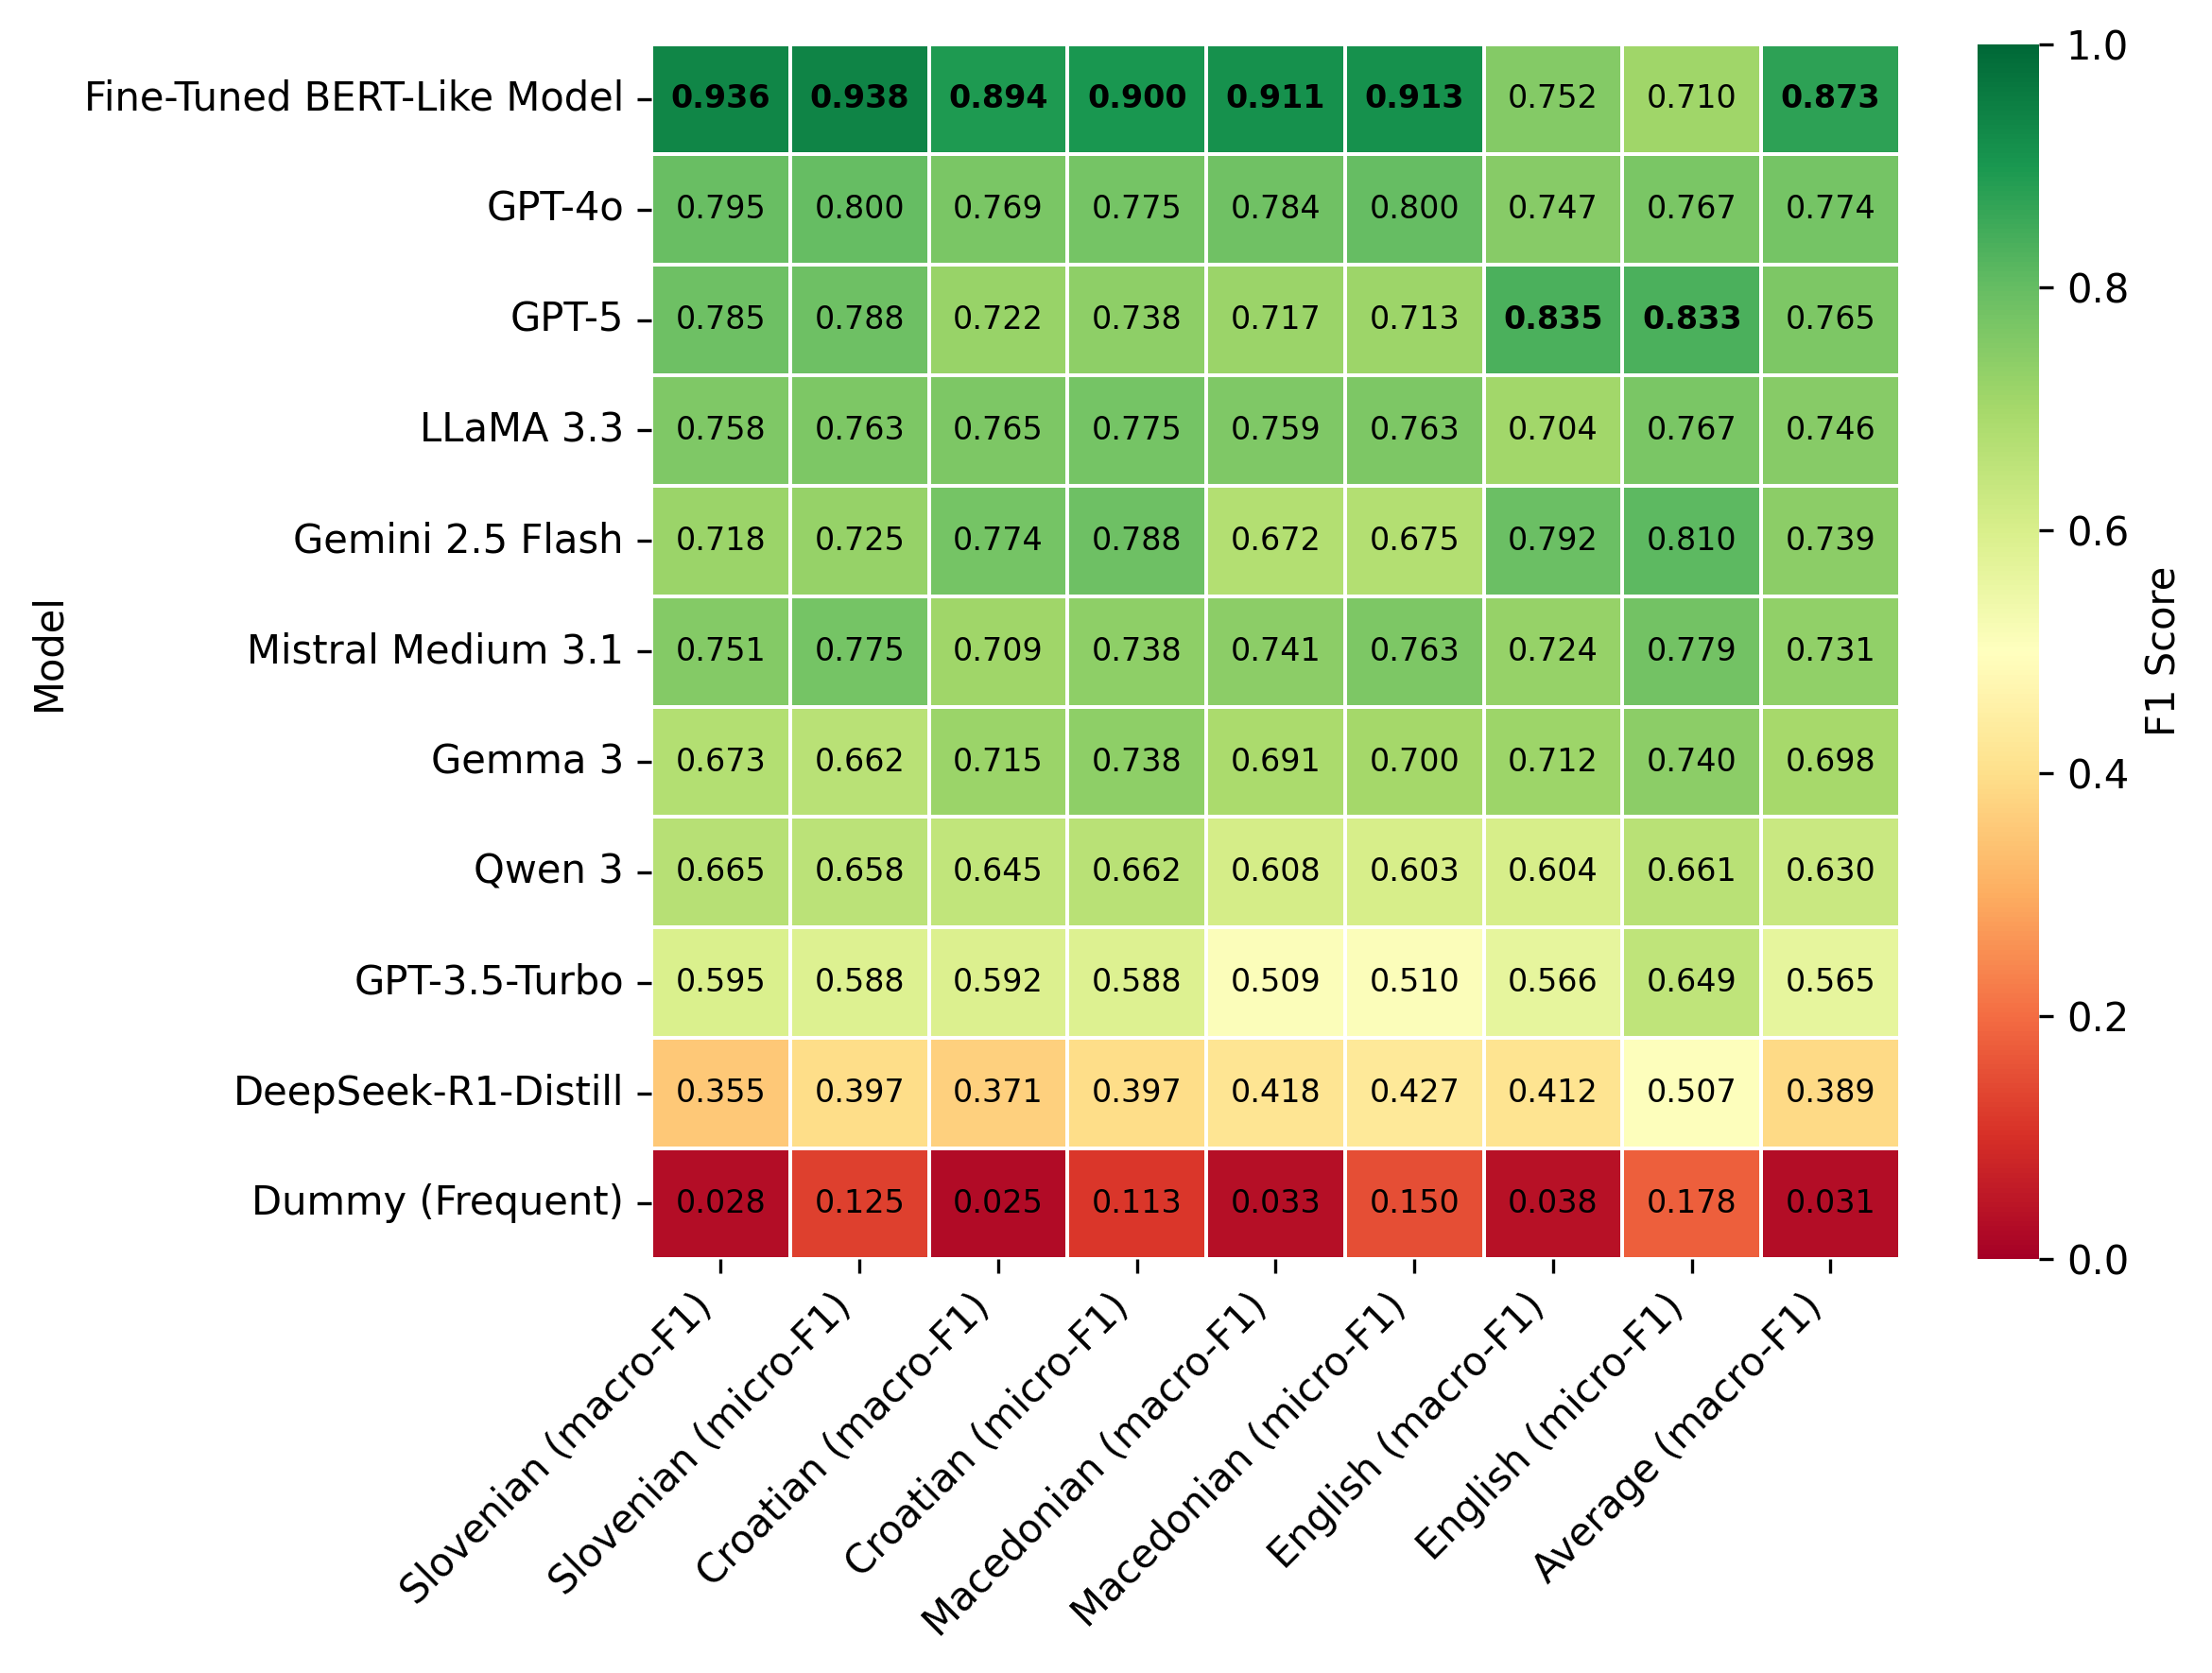

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(8, 6), dpi=300)

# Prepare data
data = results_df.set_index("Model").sort_values(by="Average (macro-F1)", ascending=False)

# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'F1 Score'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("genre-results-heatmap.png", dpi=300)
plt


In [ ]:
# Rename rule
def create_rename_dict(df):
	columns = df.columns.to_list()
	new_dict = {}
	for column in columns:
		if "macro-F1" in column:
			new_dict[column] = column.replace(" (macro-F1)", "")
	return new_dict


In [ ]:
rename_dict = create_rename_dict(results_df)
rename_dict

{'Slovenian (macro-F1)': 'Slovenian',
 'Croatian (macro-F1)': 'Croatian',
 'Macedonian (macro-F1)': 'Macedonian',
 'English (macro-F1)': 'English'}

In [ ]:
results_df.rename(columns=rename_dict, inplace=True)
results_df

/tmp/ipykernel_2274658/4210172151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.rename(columns=rename_dict, inplace=True)


,Model,Slovenian,Slovenian (micro-F1),Croatian,Croatian (micro-F1),Macedonian,Macedonian (micro-F1),English,English (micro-F1),Average
0,Dummy (Frequent),0.027778,0.125000,0.025281,0.112500,0.032609,0.150000,0.037829,0.178295,0.030874
7,Fine-Tuned BERT-Like Model,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500,0.751920,0.710059,0.873216
8,Mistral Medium 3.1,0.751347,0.775000,0.709176,0.737500,0.740609,0.762500,0.724418,0.779070,0.731387
9,Gemini 2.5 Flash,0.718463,0.725000,0.774428,0.787500,0.672083,0.675000,0.792455,0.810078,0.739357
11,GPT-4o,0.795139,0.800000,0.769334,0.775000,0.783624,0.800000,0.746628,0.767442,0.773681
13,GPT-3.5-Turbo,0.594614,0.587500,0.591614,0.587500,0.508993,0.509554,0.566300,0.648544,0.565380
15,DeepSeek-R1-Distill,0.354791,0.396694,0.370612,0.396694,0.417642,0.427481,0.412181,0.506977,0.388807
17,LLaMA 3.3,0.758149,0.762500,0.765367,0.775000,0.758635,0.762500,0.703509,0.767442,0.746415
18,Gemma 3,0.672963,0.662500,0.715242,0.737500,0.691186,0.700000,0.712072,0.740310,0.697866
19,Qwen 3,0.664700,0.658228,0.645335,0.662420,0.608128,0.602564,0.603691,0.661448,0.630463


In [ ]:
results_gpt = results_df[~results_df["Model"].isin(["Dummy (Frequent)", "Fine-Tuned BERT-Like Model", 'DeepSeek-R1-Distill'])]

results_transposed = results_gpt.set_index(results_gpt["Model"]).drop(columns=["Model", 'Slovenian (micro-F1)', 'Croatian (micro-F1)', 'Macedonian (micro-F1)', 'English (micro-F1)', 'Average']).transpose()

results_transposed = results_transposed[['GPT-3.5-Turbo', 'GPT-4o', 'GPT-5', 'Mistral Medium 3.1', 'Gemini 2.5 Flash','Gemma 3', 'LLaMA 3.3', 'Qwen 3']]

results_transposed

Model,GPT-3.5-Turbo,GPT-4o,GPT-5,Mistral Medium 3.1,Gemini 2.5 Flash,Gemma 3,LLaMA 3.3,Qwen 3
Slovenian,0.594614,0.795139,0.785263,0.751347,0.718463,0.672963,0.758149,0.664700
Croatian,0.591614,0.769334,0.722351,0.709176,0.774428,0.715242,0.765367,0.645335
Macedonian,0.508993,0.783624,0.716665,0.740609,0.672083,0.691186,0.758635,0.608128
English,0.566300,0.746628,0.835380,0.724418,0.792455,0.712072,0.703509,0.603691


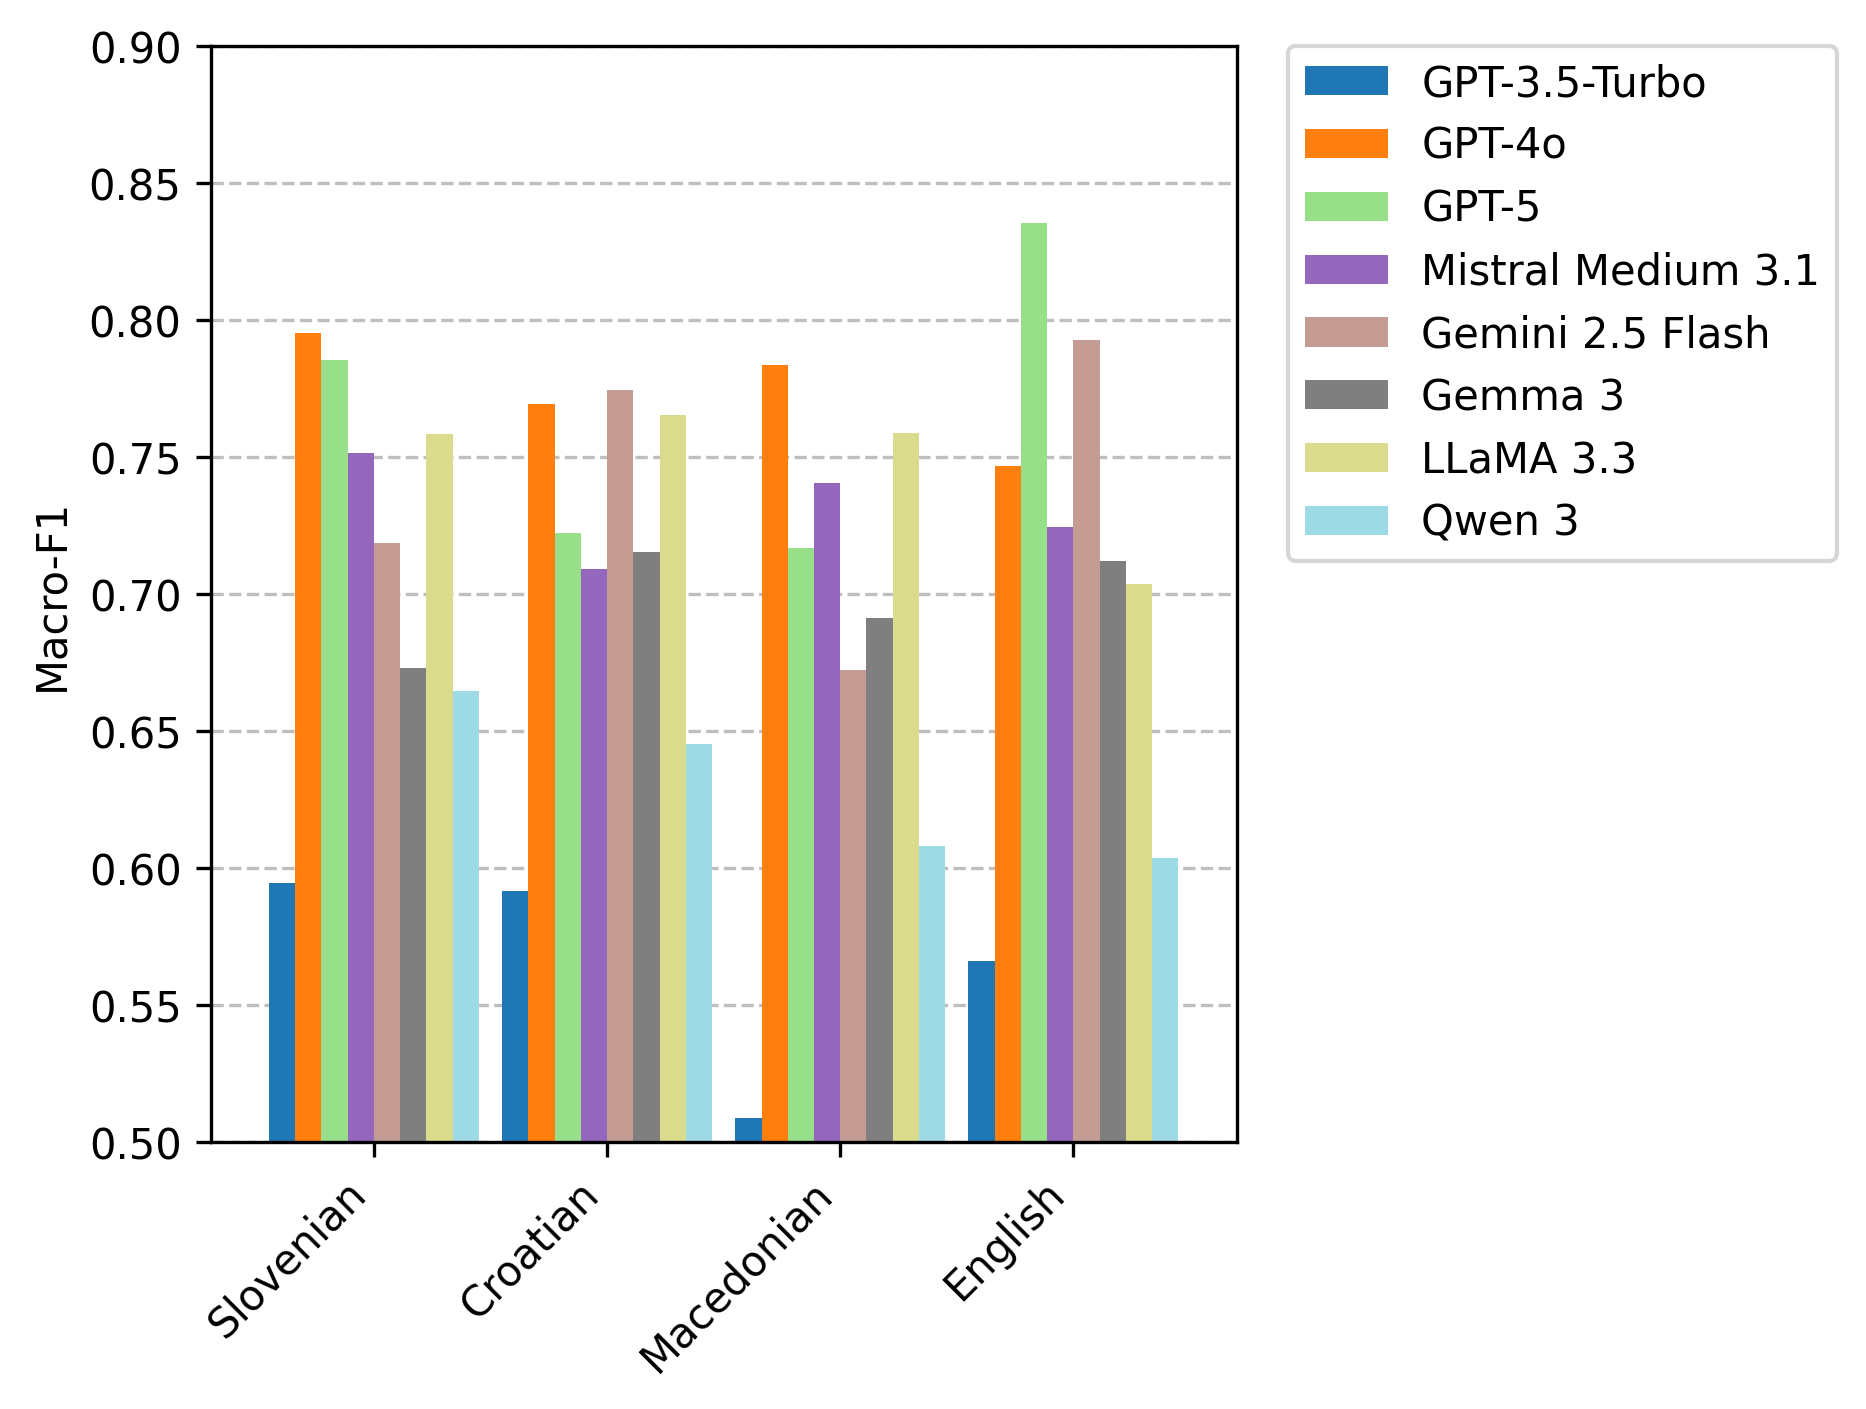

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300 

ax = results_transposed.plot(kind="bar", width=0.9,colormap="tab20")

# Move legend outside
ax.legend(
    bbox_to_anchor=(1.05, 1),  # Position legend to the right
    loc='upper left',          # Anchor point
    borderaxespad=0
)

ax.set_ylim(0.5, None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel("Macro-F1")

# Add horizontal grid lines every 0.05
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.arange(round(ymin, 2), round(ymax + 0.05, 2), 0.05))  # steps of 0.05
ax.yaxis.grid(True, linestyle='--', linewidth=0.8, color='gray', alpha=0.5)
ax.set_axisbelow(True)

plt.tight_layout()  # Adjust layout so nothing is cut off
plt.savefig("gpt_comparison.png", dpi=300)
plt.show()
